In [1]:
import csv

### Lettura del dataset

In [2]:
columns = []
pokemon_dataset = []
with open('pokemon.csv') as file:
    print(type(file))
    reader = csv.reader(file)
    columns = next(reader)
    for row in reader:
        pokemon_dataset.append(row)


<class '_io.TextIOWrapper'>


### Elenco dei Pokemon con nome e generazione

In [3]:
for i in pokemon_dataset:
    print(f"{i[0]} - {i[1]} (gen. {i[11]})")


1 - Bulbasaur (gen. 1)
2 - Ivysaur (gen. 1)
3 - Venusaur (gen. 1)
3 - VenusaurMega Venusaur (gen. 1)
4 - Charmander (gen. 1)
5 - Charmeleon (gen. 1)
6 - Charizard (gen. 1)
6 - CharizardMega Charizard X (gen. 1)
6 - CharizardMega Charizard Y (gen. 1)
7 - Squirtle (gen. 1)
8 - Wartortle (gen. 1)
9 - Blastoise (gen. 1)
9 - BlastoiseMega Blastoise (gen. 1)
10 - Caterpie (gen. 1)
11 - Metapod (gen. 1)
12 - Butterfree (gen. 1)
13 - Weedle (gen. 1)
14 - Kakuna (gen. 1)
15 - Beedrill (gen. 1)
15 - BeedrillMega Beedrill (gen. 1)
16 - Pidgey (gen. 1)
17 - Pidgeotto (gen. 1)
18 - Pidgeot (gen. 1)
18 - PidgeotMega Pidgeot (gen. 1)
19 - Rattata (gen. 1)
20 - Raticate (gen. 1)
21 - Spearow (gen. 1)
22 - Fearow (gen. 1)
23 - Ekans (gen. 1)
24 - Arbok (gen. 1)
25 - Pikachu (gen. 1)
26 - Raichu (gen. 1)
27 - Sandshrew (gen. 1)
28 - Sandslash (gen. 1)
29 - Nidoran♀ (gen. 1)
30 - Nidorina (gen. 1)
31 - Nidoqueen (gen. 1)
32 - Nidoran♂ (gen. 1)
33 - Nidorino (gen. 1)
34 - Nidoking (gen. 1)
35 - Clefairy (

### Elenco dei campi disponibili per ogni pokemon

In [4]:
for k, v in zip(columns, pokemon_dataset[0]):
    print(f"{k:10} -> {v:15} ({type(v)})")

#          -> 1               (<class 'str'>)
Name       -> Bulbasaur       (<class 'str'>)
Type 1     -> Grass           (<class 'str'>)
Type 2     -> Poison          (<class 'str'>)
Total      -> 318             (<class 'str'>)
HP         -> 45              (<class 'str'>)
Attack     -> 49              (<class 'str'>)
Defense    -> 49              (<class 'str'>)
Sp. Atk    -> 65              (<class 'str'>)
Sp. Def    -> 65              (<class 'str'>)
Speed      -> 45              (<class 'str'>)
Generation -> 1               (<class 'str'>)
Legendary  -> False           (<class 'str'>)


Purtroppo tutti i campi sono letti come stringa. Dobbiamo convertire in numero le colonne da `HP` a `Speed`

In [5]:
num_indexes = [5, 6, 7, 8, 9, 10]

numerical_data = []
for i in range(len(pokemon_dataset)):
    row = pokemon_dataset[i]
    num_row = []
    for col in num_indexes:
        num_row.append(float(row[col]))

    numerical_data.append(num_row)

for k, v in zip(columns[5:11], numerical_data[0]):
    print(f"{k:10} -> {v:5} ({type(v)})")

HP         ->  45.0 (<class 'float'>)
Attack     ->  49.0 (<class 'float'>)
Defense    ->  49.0 (<class 'float'>)
Sp. Atk    ->  65.0 (<class 'float'>)
Sp. Def    ->  65.0 (<class 'float'>)
Speed      ->  45.0 (<class 'float'>)


In [6]:
'''
Normalizzare significa scalare tutti i dati fra 0 e 1.
Prendiamo la prima entry del dataset e riga per riga/colonna per colonna
ci andiamo a costruire un elenco di valori per colonna:
es. dataset di partenza:
    [
        [20, 40, 50],
        [30, 10, 60],
        [50, 35, 70],
        [10, 11, 80],
    ]

    col_values:
        [ 20, 30, 50, 10 ],
        [ 40, 10, 35, 11 ],
        [ 50, 60, 70, 80 ]
    trovo min e max delle singole righe di col_values (i cui indici sono 
    gli indici delle colonne del dataset iniziale )

    colonna 0 -> (10, 50)
    colonna 1 -> (10, 40)
    colonna 2 -> (50, 80)

    quindi avremo: 
    [
        (10, 50),
        (10, 40),
        (50, 80),
    ]
'''

def normalize(dataset):
    output = []

    min_max = []

    for i in range(len(dataset[0])):
        # per ciascuna colonna:
            # prendiamo tutti i valori di quella colonna nel dataset
            # calcoliamo val. minimo e max della colonna
            # add della tupla min/max della colonna alla lista min_max
        col_values = [row[i] for row in dataset]
        min_max.append((min(col_values), max(col_values)))

    print(min_max)
    for row in dataset:
        scaled_row = []
        for col_index in range(len(row)):
            col_value = row[col_index]
            scaled_value = (col_value - min_max[col_index][0])/(min_max[col_index][1] - min_max[col_index][0])
            scaled_row.append(scaled_value)

        output.append(scaled_row)

    return output

# Calcola la distanza di minkowski fra 2 punti. 
# Si può semplificare andando a prendere direttamente la dist. euclidea e basta
def minkowski_distance(p1, p2, p = 2):
        # https://rittikghosh.com/images/min.png
        # p = 1 -> Manhattan Distance
        # p = 2 -> Euclidean Distance
        dim = len(p1)
        distance = 0
        for d in range(dim):
            distance += abs(p1[d] - p2[d]) ** p

        distance = distance**(1/p)

        return distance

'''
    Questa funzione ci restituisce una lista di lunghezza pari a K 
    contenente una serie di tuple in cui abbiamo:
        - indice i dell'elemento nel dataset
        - distanza della riga test_row dall'elemento con indice i
'''
def get_k_neighbors(k, dataset, test_row):
    dataset.append(test_row)
    norm_dataset = normalize(dataset)
    norm_test_row = norm_dataset[-1]
    norm_dataset = norm_dataset[:-1]

    distances = []

    for i in range(len(norm_dataset)):
        row = norm_dataset[i]
        d = minkowski_distance(norm_test_row, row)
        distances.append((i, d))


    distances.sort(key=lambda tup: tup[1])

    return distances[:k]

def print_pokemon_info(i):
    s = f"{pokemon_dataset[i][0]} - {pokemon_dataset[i][1]}, di tipo {pokemon_dataset[i][2]} (gen. {pokemon_dataset[i][-2]})"
    if pokemon_dataset[i][-1] == "True":
        s += f"\n - POKEMON LEGGENDARIO"

    for k in num_indexes:
        s += f"\n{columns[k]:20}: {pokemon_dataset[i][k]}"
    return s

Prendiamo in input i dati dell'utente (Questa si può migliorare)

In [14]:
user_row = []

k = 5

for i in range(len(num_indexes)):
    col_index = num_indexes[i]
    v = input(f"Inserisci il tuo valore di {columns[col_index]}\n")
    user_row.append(float(v))

for k, v in zip(columns[5:11], user_row):
    print(f"{k:10} -> {v:15} ({type(v)})")

print("Calcolo i tuoi pokemon più affini...")

l = get_k_neighbors(5, numerical_data, user_row)
print(l)

for p in l:
    print(print_pokemon_info(p[0]))

Inserisci il tuo valore di HP
45
Inserisci il tuo valore di Attack
58
Inserisci il tuo valore di Defense
35
Inserisci il tuo valore di Sp. Atk
66
Inserisci il tuo valore di Sp. Def
89
Inserisci il tuo valore di Speed
29
HP         ->            45.0 (<class 'float'>)
Attack     ->            58.0 (<class 'float'>)
Defense    ->            35.0 (<class 'float'>)
Sp. Atk    ->            66.0 (<class 'float'>)
Sp. Def    ->            89.0 (<class 'float'>)
Speed      ->            29.0 (<class 'float'>)
Calcolo i tuoi pokemon più affini...
[(1.0, 255.0), (5.0, 190.0), (5.0, 230.0), (10.0, 194.0), (20.0, 230.0), (5.0, 180.0)]


TypeError: slice indices must be integers or None or have an __index__ method

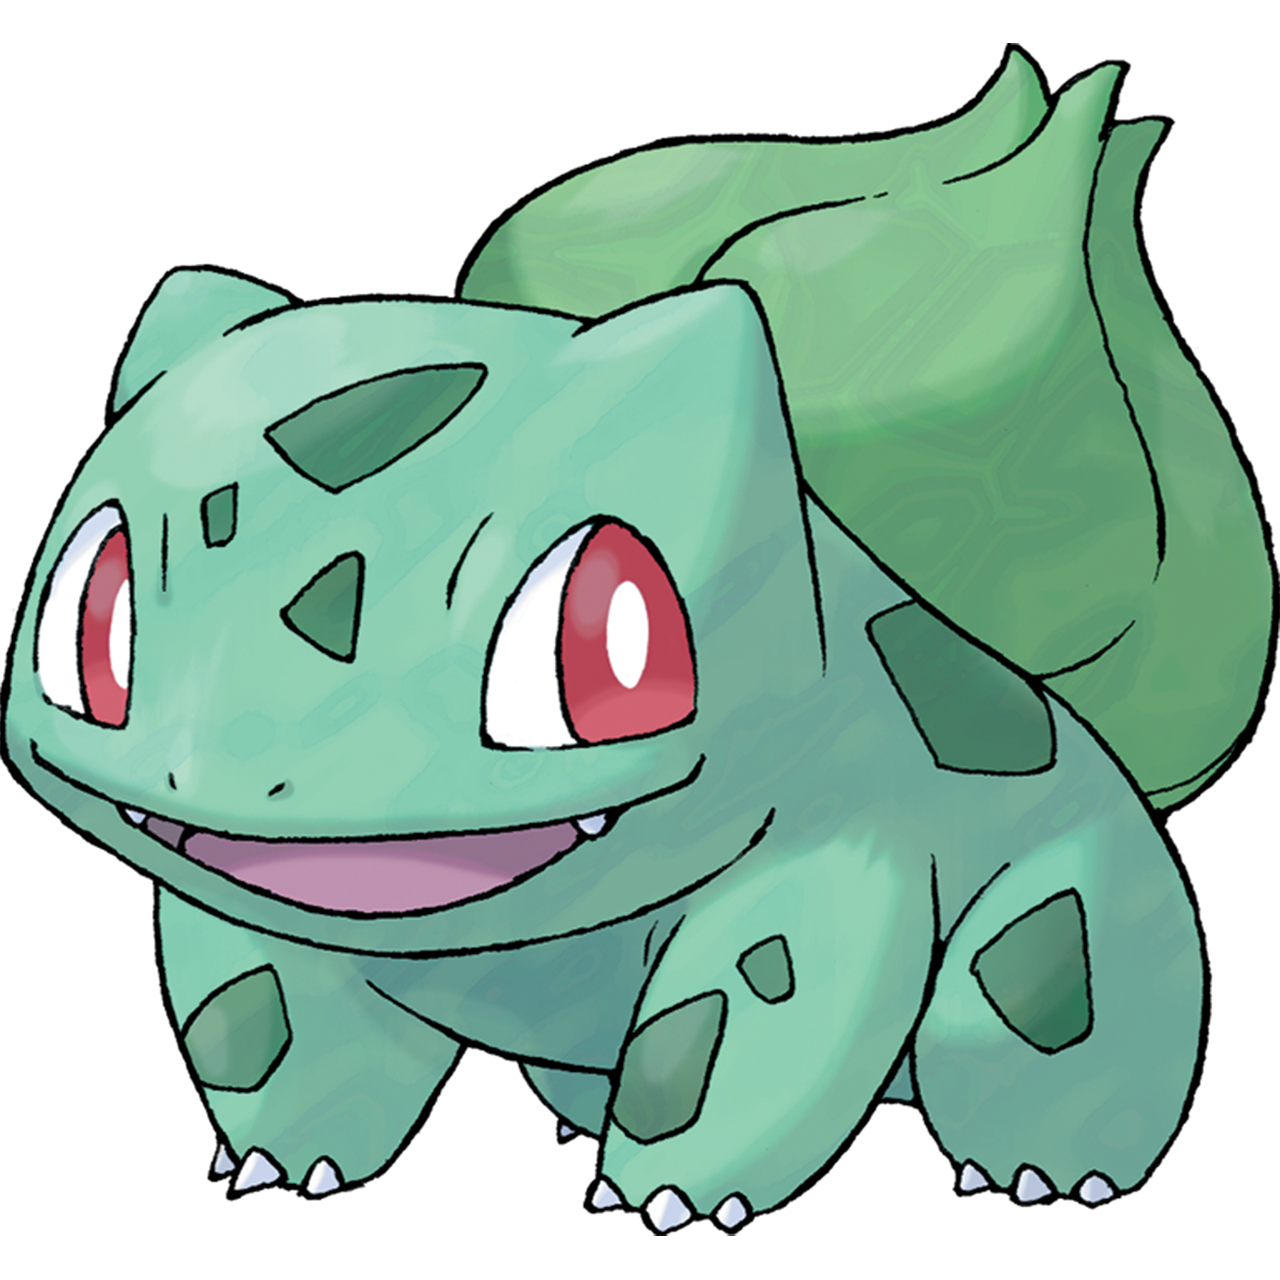

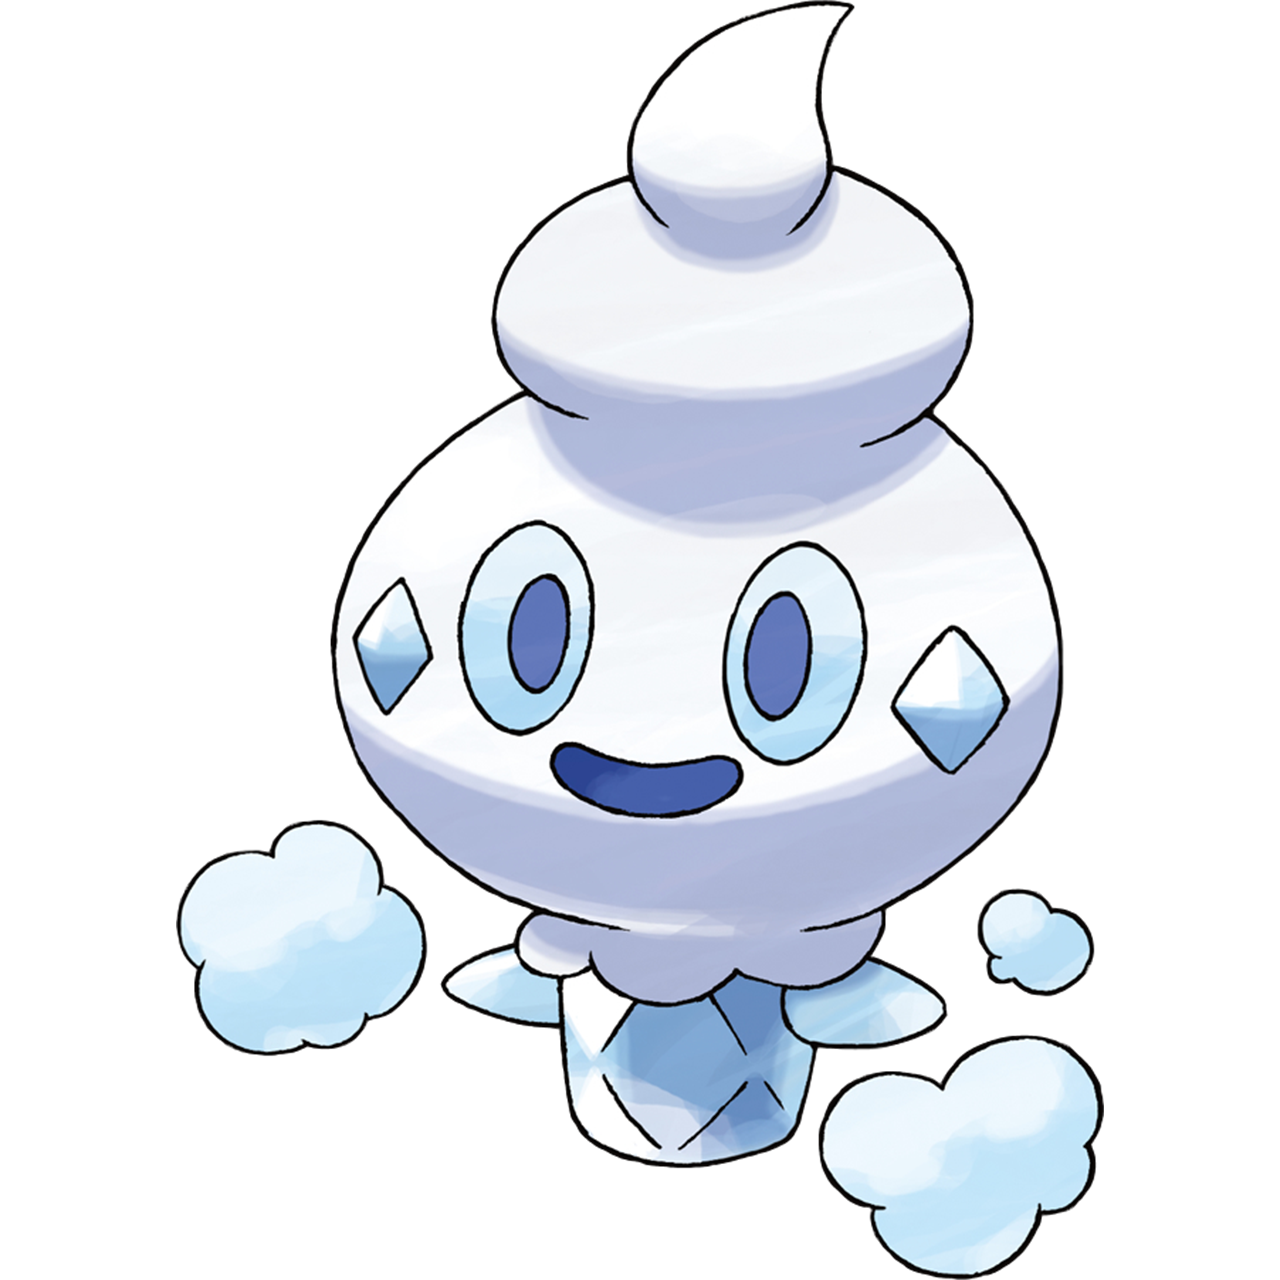

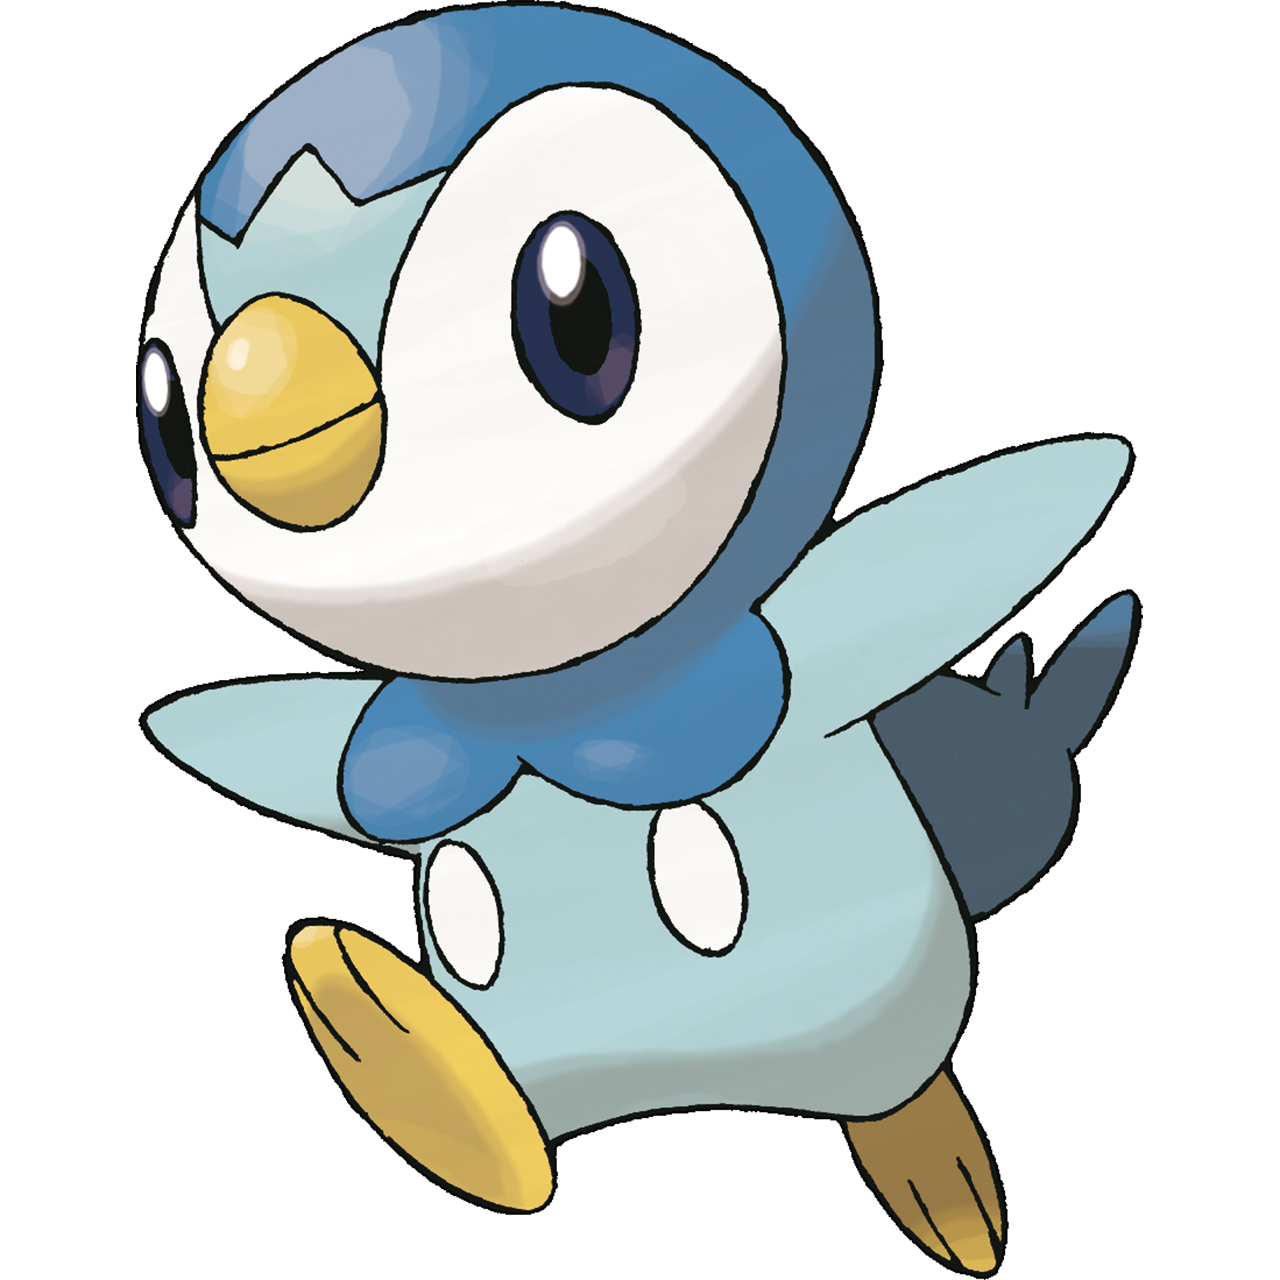

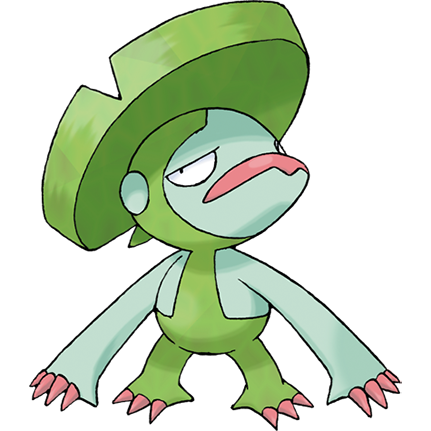

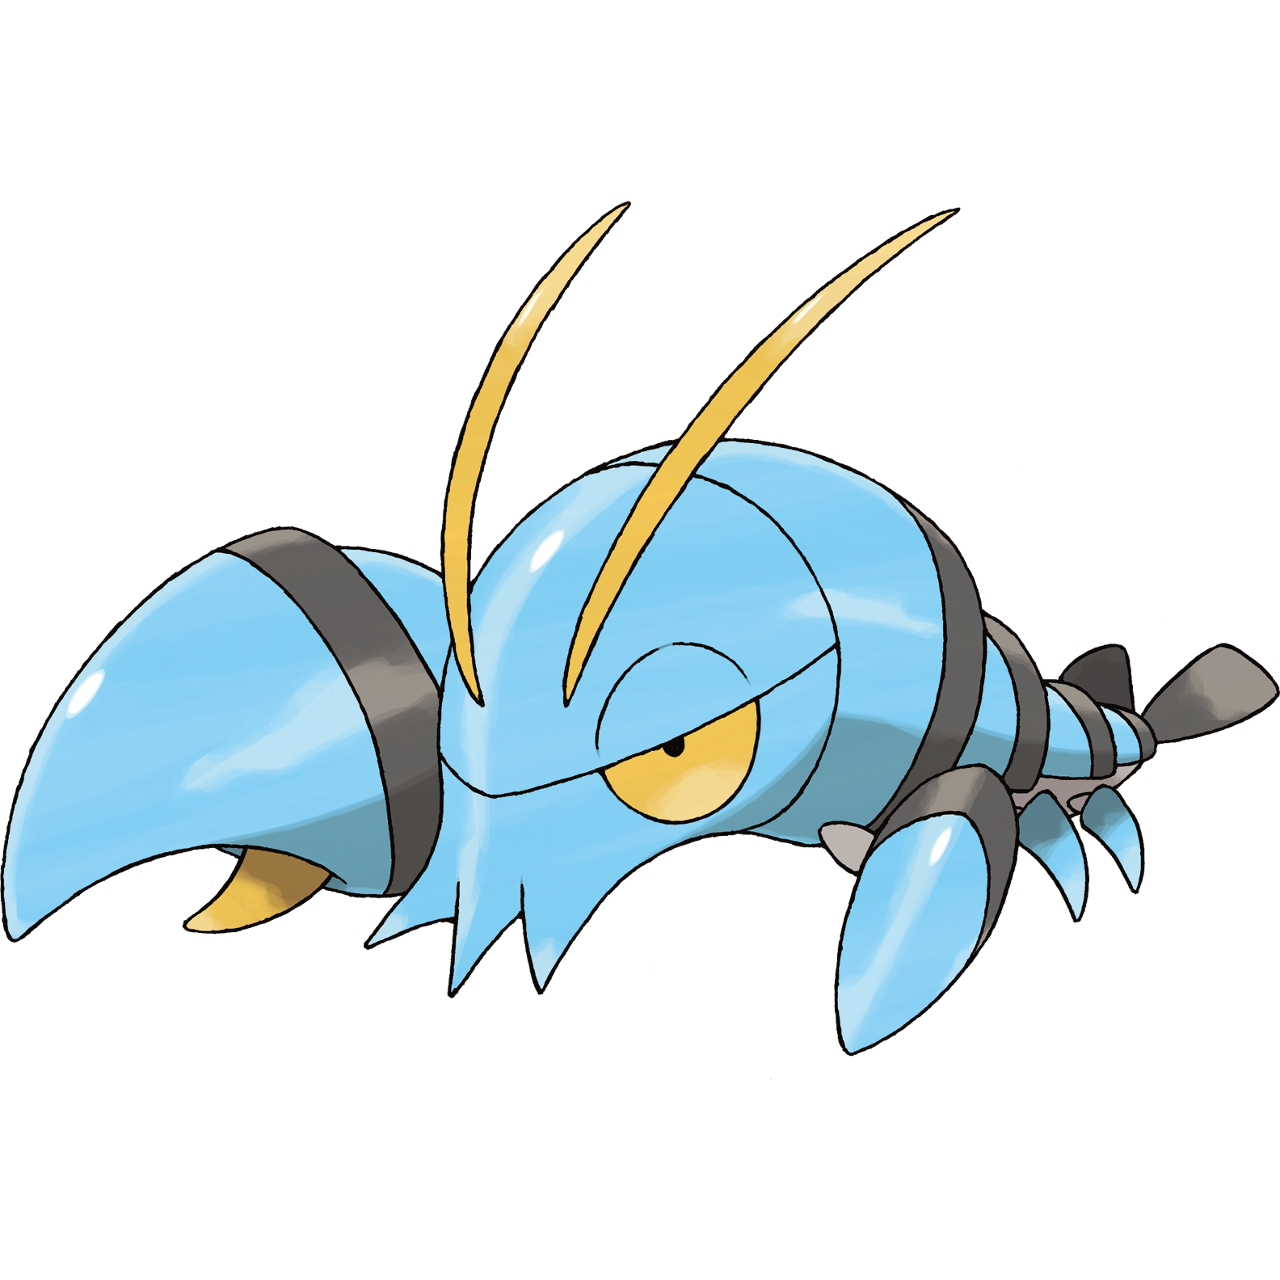

In [10]:
from IPython.display import Image, display

images_paths = [ f"sugimori/{pokemon_dataset[p[0]][0]}.png" for p in l ]
for imageName in images_paths:
    display(Image(filename=imageName))

In [12]:
import ipyplot

ipyplot.plot_images(images_paths, max_images=k, img_width=150)

TypeError: slice indices must be integers or None or have an __index__ method